# Lesson 27: Meteorite Landings - Histogram

### Teacher-Student Activities

In the previous classes, we learnt how to create a count plot. In this class, we will learn another type of graph called a histogram.

A histogram is very similar to a count plot. It also shows the count of values. However, unlike the discrete counts in a count plot, a histogram shows the continuous counts of values. You will get a better understanding once we start creating a histogram.

Let's quickly rush through the activities we covered in the previous class and begin this class from **Activity 1: Count Plot** section.



---

#### Recap

Dataset Link (don't click on it):

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv


In [ ]:
# Below are the activities that have been covered in the previous class.
# 1. Import the necessary libraries for this class and create a DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

met_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')

# 2. Find the number of rows and columns in the DataFrame.
print(met_df.shape)

# 3. Rows containing the year values less than 860 and greater than 2016.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]

# 4. Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]

# 5. Rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]

# 6. Indices of the rows having missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

# 7. Missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

# 8. Convert the 'year' values into an integer type values.
correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')

(45716, 10)


<ipython-input-1-fd2cfd8f6cb9>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')
<ipython-input-1-fd2cfd8f6cb9>:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')


---

#### Activity 1: Count Plot

Recall that in the previous class we couldn't draw count plots for all the meteorites found in a year. We had to divide the years in the 20 to 30 years period and then draw the count plot. The count plot really works well when you want to look at the variation in the count of a feature across a category. E.g., we observed that the count of `Valid` meteorites was more than the count of the `Relict` meteorites for a year. So, this is where the count plots are really helpful.

However, if you want to observe the count trend in one single graph, then, in that case, it is better to create a histogram.

*A histogram is a type of bar graph which plots the data falling in the same interval together.* Let's understand a histogram through an example.

Consider the count of the meteorites between the years `1970` & `2000`. Let's create a count plot for this period.

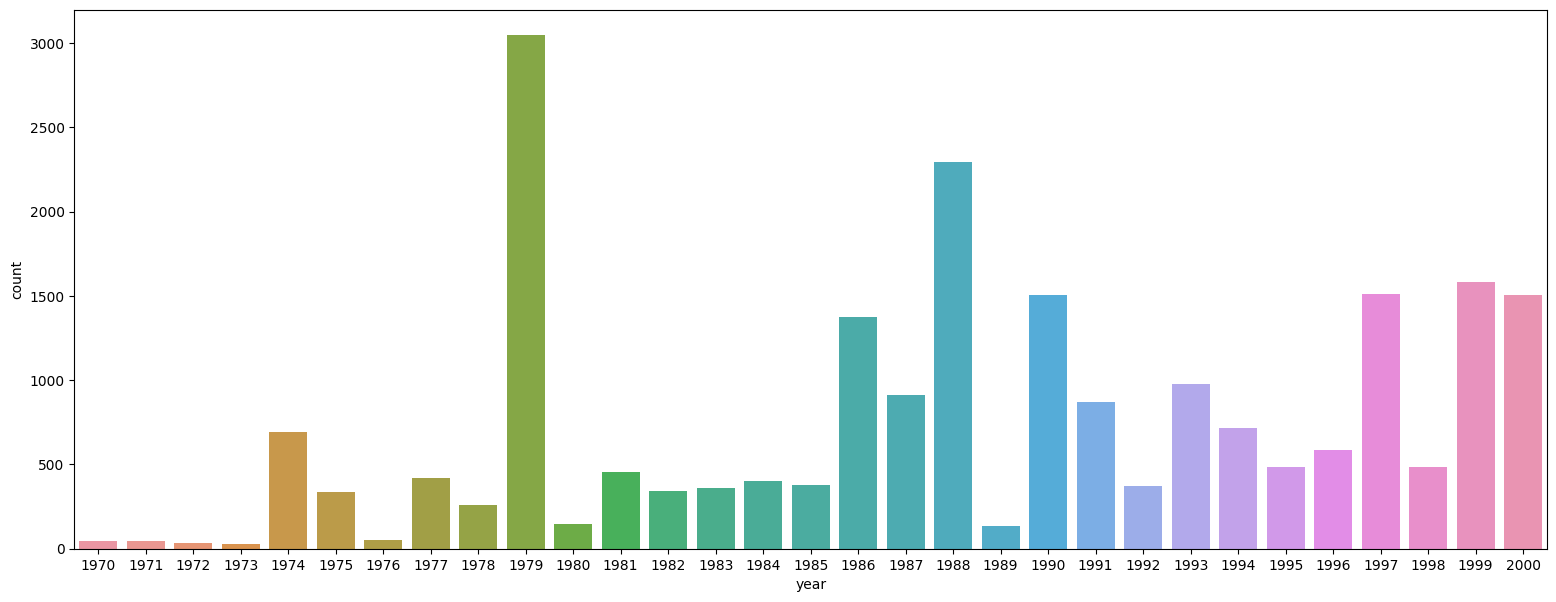

In [ ]:
# Student Action: Create a count plot for the count of the meteorites between the years 1970 & 2000.
import seaborn as sns

# Create a DataFrame for the meteorites fallen between 1970 and 2000 including both.
met_1970_2000_df=correct_lat_long_df[(correct_lat_long_df['year']>=1970) & (correct_lat_long_df['year']<=2000)]

# Create a count plot for the meteorites fallen between 1970 and 2000 including both.
plt.figure(figsize=(19,7))
sns.countplot(x='year', data=met_1970_2000_df)
plt.show()

In [ ]:
met_1970_2000_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.883330, -99.900000)"
10,Aioun el Atrouss,423,Valid,Diogenite-pm,1000.0,Fell,1974,16.39806,-9.57028,"(16.398060, -9.570280)"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981,39.91667,42.81667,"(39.916670, 42.816670)"
31,Alta'ameem,2284,Valid,LL5,6000.0,Fell,1977,35.27333,44.21556,"(35.273330, 44.215560)"
41,Anlong,2305,Valid,H5,2500.0,Fell,1971,25.15000,105.18333,"(25.150000, 105.183330)"
...,...,...,...,...,...,...,...,...,...,...
45709,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981,31.20000,112.50000,"(31.200000, 112.500000)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990,29.03700,17.01850,"(29.037000, 17.018500)"
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.783330, 8.966670)"


Now, suppose we want to plot a bar graph for the count of the number of meteorites fallen in the interval of 5 years between 1970 and 2000. In this case, we will have 6 intervals. They are:

1. 1970 to 1975 (excluding 1975)

2. 1975 to 1980 (excluding 1980)

3. 1980 to 1985 (excluding 1985)

4. 1985 to 1990 (excluding 1990)

5. 1990 to 1995 (excluding 1995)

6. 1995 to 2000 (**including** 2000)



---

#### Activity 2: Histogram Using The `hist()` Function

To create such bar graphs, we use a histogram. The bars in the count plot merge together to form one bar in the histogram. So, for the interval:

1. 1970 to 1975 (excluding 1975), the bars in a count plot for the years 1970, 1971, 1972, 1973 and 1974 will merge together to form one bar in a histogram.

2. 1975 to 1980 (excluding 1980), the bars in a count plot for the years 1975, 1976, 1977, 1978 and 1979 will merge together to form one bar in a histogram.

3. 1980 to 1985 (excluding 1985), the bars in a count plot for the years 1980, 1981, 1982, 1983 and 1984 will merge together to form one bar in a histogram.

4. 1985 to 1980 (excluding 1990), the bars in a count plot for the years 1985, 1986, 1987, 1988 and 1989 will merge together to form one bar in a histogram.

5. 1990 to 1995 (excluding 1995), the bars in a count plot for the years 1990, 1991, 1992, 1993 and 1994 will merge together to form one bar in a histogram.

6. 1995 to 2000 (**including** 2000), the bars in a count plot for the years 1995, 1996, 1997, 1998 and 2000 will merge together to form one bar in a histogram.

To create a histogram, you can use the `hist()` function which exists in the `matplotlib.pyplot` library. The `hist()` function requires a one dimensional array/list/series as an input to create a histogram. Let's create a histogram for the Pandas series which contains the year values between 1970 and 2000 including both of them, i.e.,

`correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001)]`


In [ ]:
# Teacher Action: Create a Pandas series containing the year values between 1970 and 2000 including both of them.
met_1970_2000_series=correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970)&(correct_lat_long_df['year'] < 2001),"year"]
met_1970_2000_series

3        1976
10       1974
16       1981
31       1977
41       1971
         ... 
45709    1981
45710    1990
45711    1990
45712    1999
45715    1976
Name: year, Length: 22368, dtype: int64

So, we have sliced the `correct_lat_long_df` DataFrame to obtain a Pandas series countaining the year values between the years 1970 and 2000. **Since for every meteorite, we have recorded its fall year. Hence, the number of year values is equal to the number of meteorites fallen on Earth.**

Now let's create a histogram for the meteorites fallen between 1970 and 2000 using the `hist()` function. We will provide two inputs to the function. They are:

1. The Pandas series `met_bet_1970_and_2000_series` for which the histogram needs to be created.

2. The `bins` value to define the number of bars to be created in the histogram. Here, we are going to create 6 bars, hence we will pass `bins=6` as the second input to the `hist()` function.



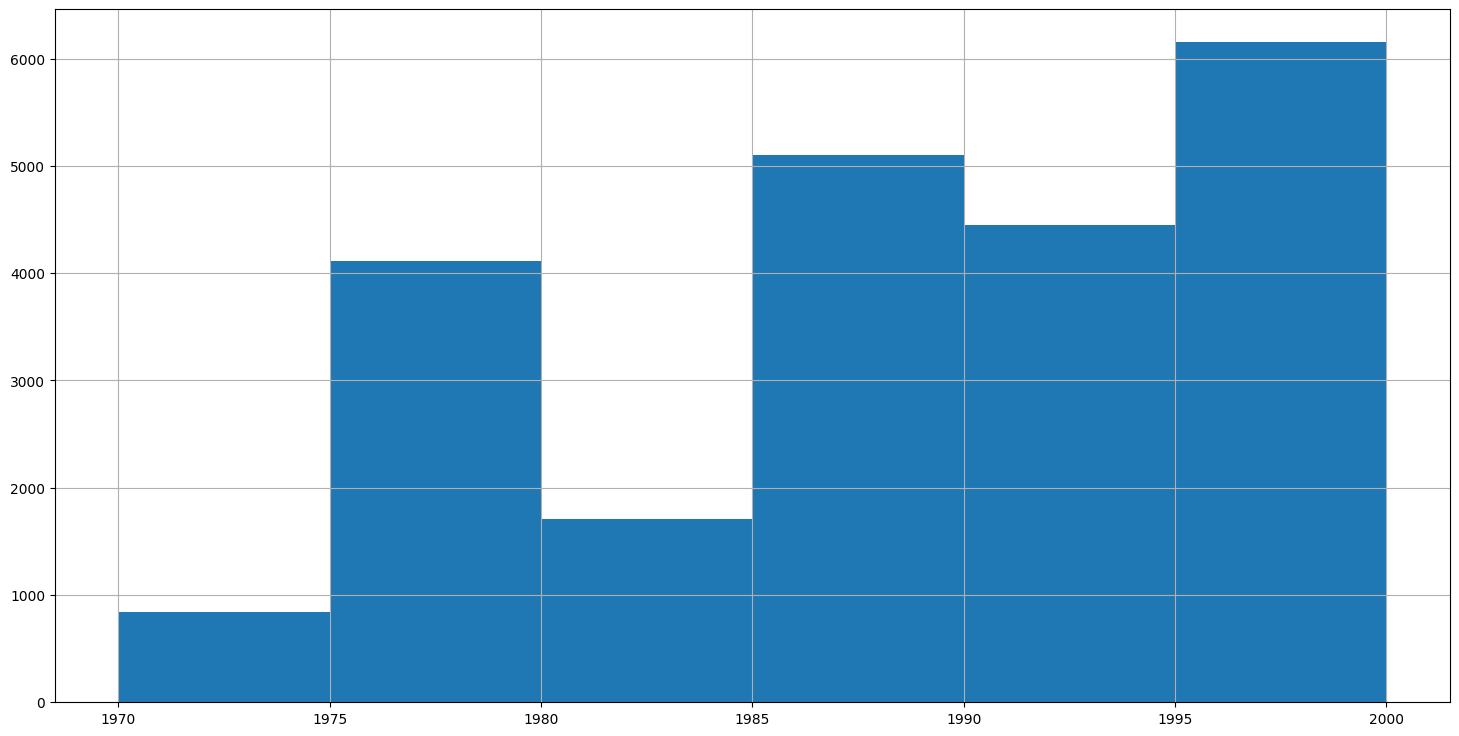

In [ ]:
# Teacher Action: Create a histogram for the Pandas series containing the year values between 1970 and 2000 including both of them.
plt.figure(figsize=(18,9))
plt.hist(met_1970_2000_series,bins=6)
plt.grid()
plt.show()

In the histogram above, on the horizontal axis, we have the year values and on the vertical axis, we have the count of the meteorites fallen to Earth including both `Fell` & `Found` meteorites. So from the histogram, we can say that

1. just below 1000 meteorites fell on Earth from 1970 to 1975 (excluding 1975)

2. just over 4000 meteorites fell on Earth from 1975 to 1980 (excluding 1980)

3. just below 2000 meteorites fell on Earth from 1980 to 1985 (excluding 1985)

4. just over 5000 meteorites fell on Earth from 1985 to 1990 (excluding 1990)

5. just below 4500 meteorites fell on Earth from 1990 to 1995 (excluding 1995)

6. just over 6000 meteorites fell on Earth from 1995 to 2000 (**including** 2000)


---

#### Activity 3: The `sum()` Function^^

We can find the actual number of meteorites fell on Earth in each of the six intervals using the `sum()` function which exists in the Pandas module.

**Note:** Number of meteorites fell on Earth is equal to the number of year values.

To do this exercise, first, obtain a Pandas series containing the year values for each interval of 5 years using the `loc[]` function. E.g.,

```
correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 1975), 'year']
```

Then apply the `value_counts()` function followed by the `sum()` function. The `value_counts()` function will return another Pandas series containing the count of year values in the 5 year interval. The `sum()` function will return the sum of the all counts. E.g.,

```
correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 1975), 'year'].value_counts().sum()
```

In [ ]:
# Student Action: Find the actual number of meteorites fell on Earth in each of the six intervals.
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 1975), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1975) & (correct_lat_long_df['year'] < 1980), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1980) & (correct_lat_long_df['year'] < 1985), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1985) & (correct_lat_long_df['year'] < 1990), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1990) & (correct_lat_long_df['year'] < 1995), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1995) & (correct_lat_long_df['year'] <= 2000), 'year'].value_counts().sum())

846
4116
1708
5098
4448
6152


Therefore,

- 846 meteorites fell on Earth from 1970 to 1975 (excluding 1975)

- 4116 meteorites fell on Earth from 1975 to 1980 (excluding 1980)

- 1708 meteorites fell on Earth from 1980 to 1985 (excluding 1985)

- 5098 meteorites fell on Earth from 1985 to 1990 (excluding 1990)

- 4448 meteorites fell on Earth from 1990 to 1995 (excluding 1995)

- 6152 meteorites fell on Earth from 1995 to 2000 (**including** 2000)


There's an alternate way to do the above exercise. Create a `while` loop to iterete through each interval of 5 years to count the number of years in each interval.


In [ ]:
# Teacher Action: Create a 'while' loop to iterete through first 5 intervals to obtain the count of the meteorites fallen.
y=1970
while y<1995:
  print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= y) & (correct_lat_long_df['year'] < y+5), 'year'].value_counts().sum())
  y=y+5
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1995) & (correct_lat_long_df['year'] <= 2000), 'year'].value_counts().sum())


846
4116
1708
5098
4448
6152


---

#### Activity 4: Histogram Using The `distplot()` Function^

We can also create a histogram using the `distplot()` function from the `seaborn` module. The term `distplot` stands for distribution plot. It also takes a Pandas series / NumPy array / Python list as an input. The other inputs that you can provide are `bins` and `kde` values. The `kde` parameter takes a boolean value, i.e., either `True` or `False`. Let's set the `bins` parameter equal to `6` and the `kde` parameter equal to `False` in the `distplot()` function. We will learn about the `kde` parameter later.

<ipython-input-13-d706fd654056>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(met_1970_2000_series,bins=6,kde=False)


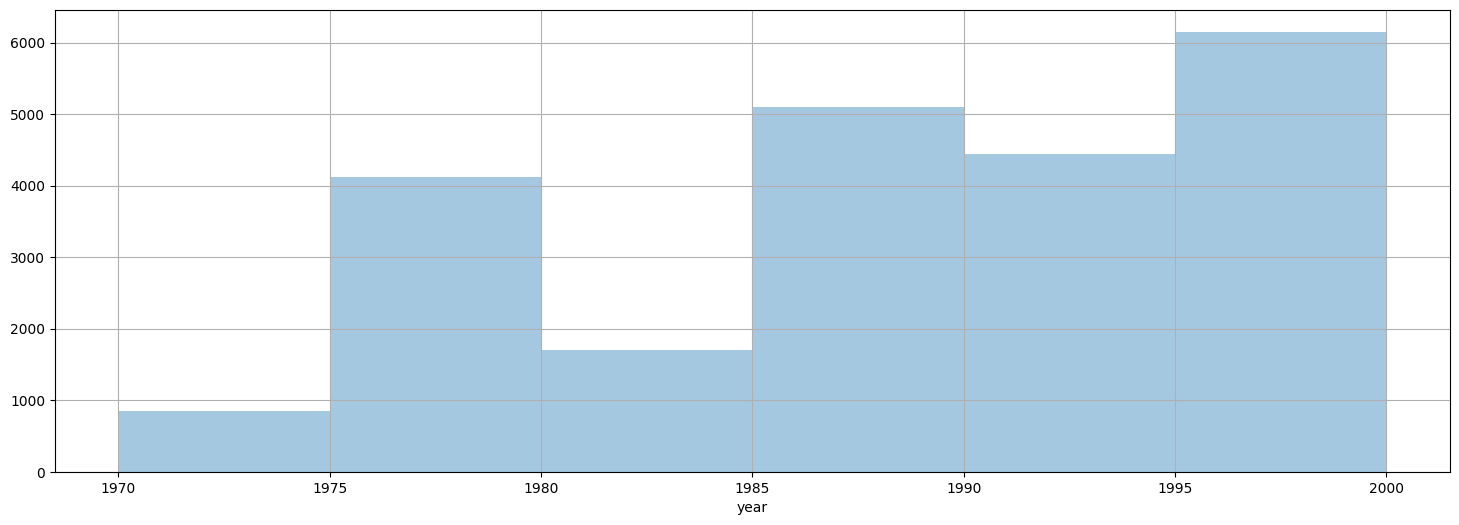

In [ ]:
# Teacher Action: Create a histogram using the 'distplot()' function from the seaborn library.
plt.figure(figsize=(18,6))
sns.distplot(met_1970_2000_series,bins=6,kde=False)
plt.grid()
plt.show()

As you can see, we have created the same histogram using the `distplot()` function. **The `distplot()` function is smarter in terms of choosing the appropriate default number of bins**. Hence, it is best to create a histogram using the `distplot()` function over the `hist()` function.

Now, let's create a histogram to see the distribution of the fall of meteorites over the years starting from the year `860`.

<ipython-input-7-51dd9184933e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(correct_lat_long_df['year'],kde=False)


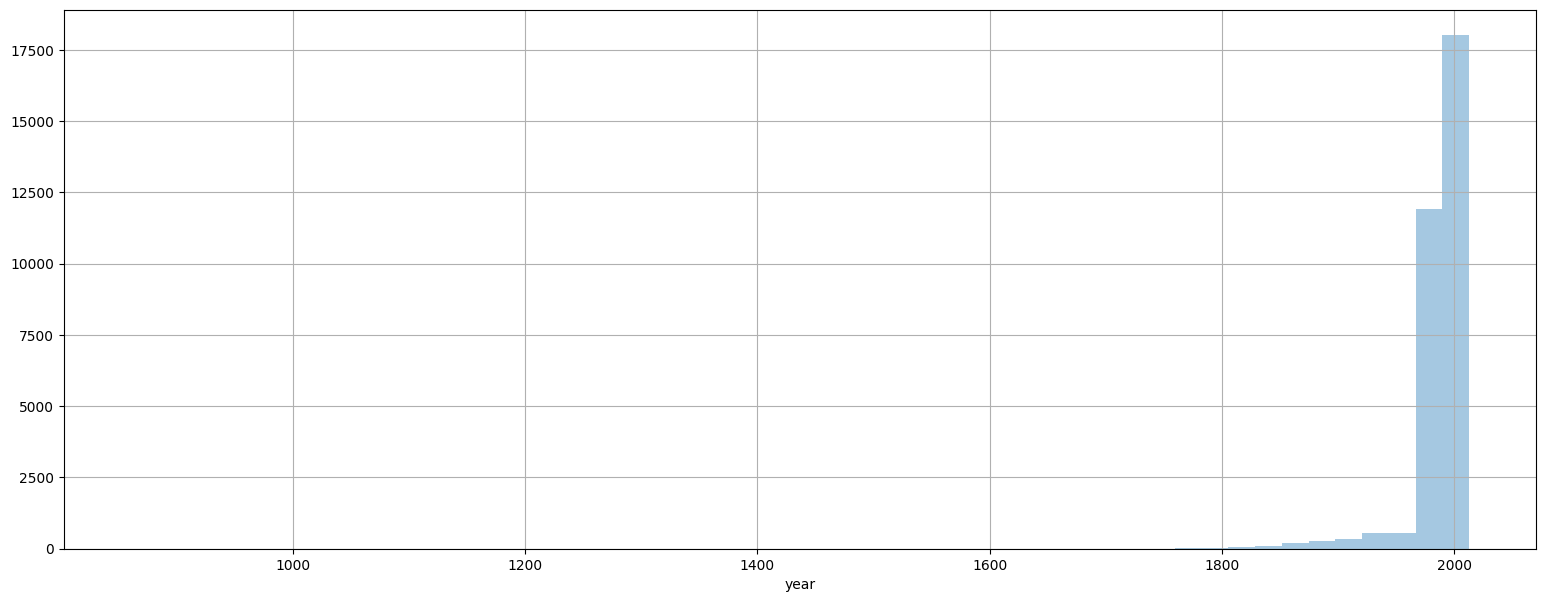

In [ ]:
# Student Action: Create a histogram for the 'year' column in the 'correct_lat_long_df' DataFrame using the 'distplot()' function.
plt.figure(figsize=(19,7))
sns.distplot(correct_lat_long_df['year'],kde=False)
plt.grid()
plt.show()

If you look at the graph, the number of meteorites fallen to Earth is almost 0 till the year 1800. After that, there is some increase but it is very little. After 1900, the is a rapid increase in the number of meteorites fallen to Earth.

Let's closely observe the period after 1900 to see the variation in the number of meteorites falling to Earth by creating another histogram.

<ipython-input-8-e56c5ba4cc6d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(correct_lat_long_df.loc[correct_lat_long_df['year']>1900,'year'],kde=False)


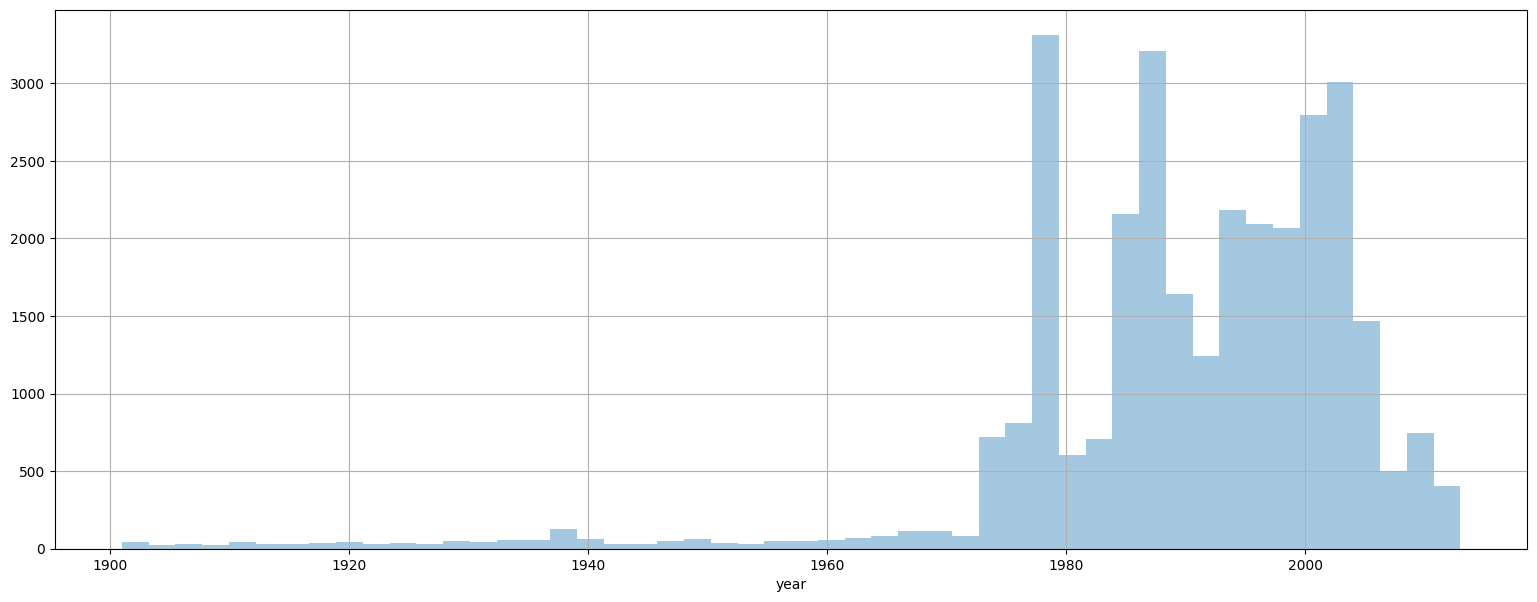

In [ ]:
# Student Action: Create a histogram to visualise the number of meteorites fallen after the year 1900 using the 'distplot()' function.
plt.figure(figsize=(19,7))
sns.distplot(correct_lat_long_df.loc[correct_lat_long_df['year']>1900,'year'],kde=False)
plt.grid()
plt.show()

If you increase the size of the bins, the width of the bars will decrease whereas if you decrease the size of the bins, the width of the bars will increase.


<ipython-input-9-57cc6d6cd4c5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(correct_lat_long_df.loc[correct_lat_long_df['year']>1900,'year'],bins=25,kde=False)


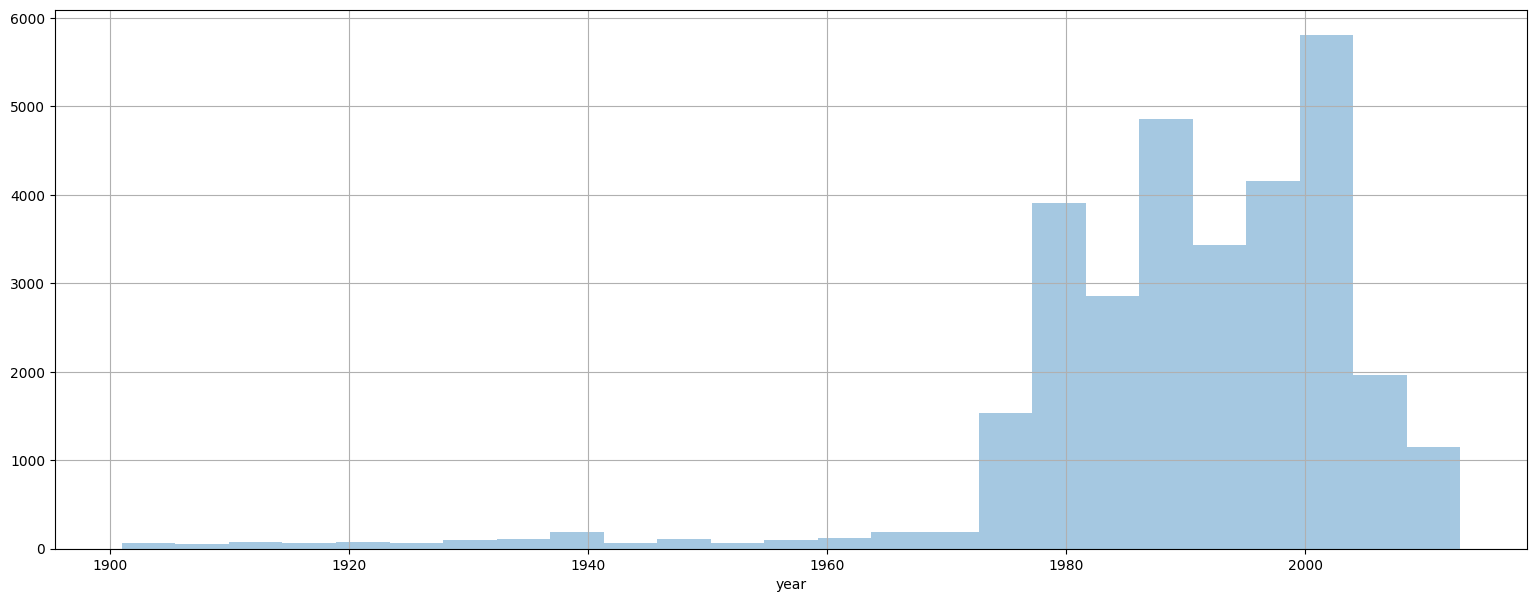

In [ ]:
# Student Action: Set the bins size equal to 25 in the previous histogram.
plt.figure(figsize=(19,7))
sns.distplot(correct_lat_long_df.loc[correct_lat_long_df['year']>1900,'year'],bins=25,kde=False)
plt.grid()
plt.show()

<ipython-input-10-73d24cd51f00>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(correct_lat_long_df.loc[correct_lat_long_df['year']>1900,'year'],bins=100,kde=False)


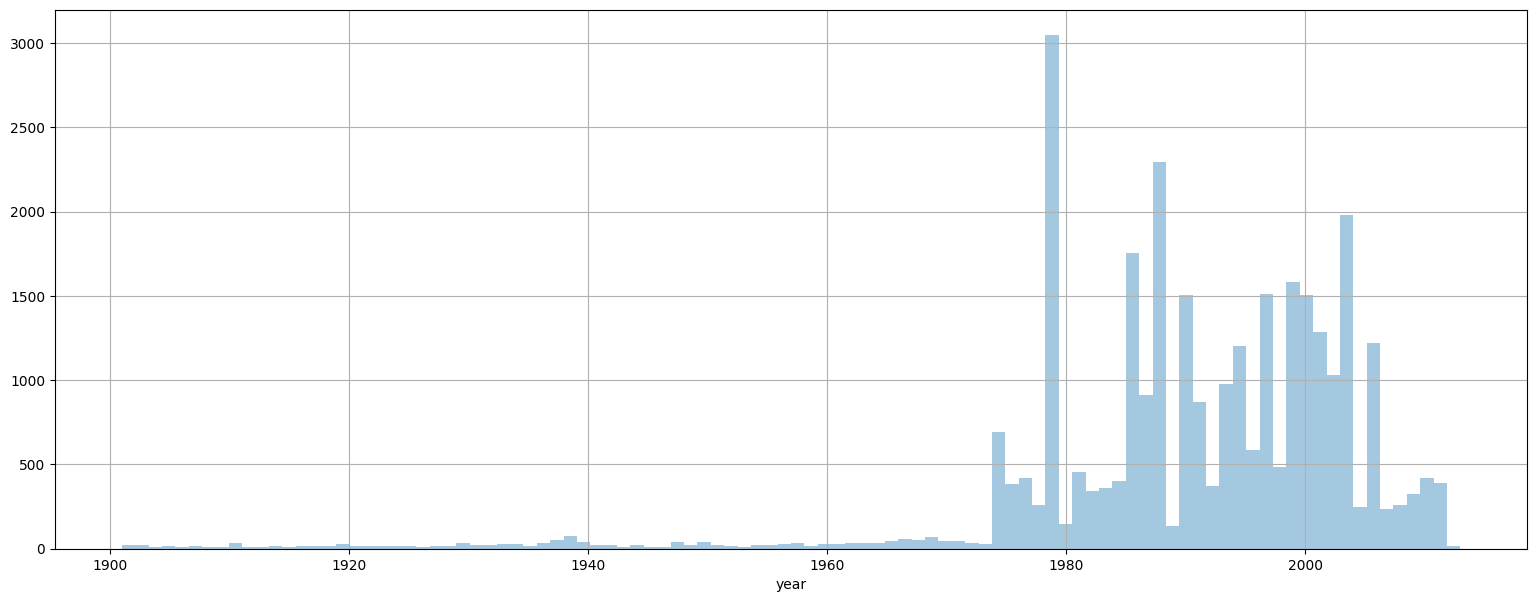

In [ ]:
# Student Action: Set the bins size equal to 100 in the previous histogram.
plt.figure(figsize=(19,7))
sns.distplot(correct_lat_long_df.loc[correct_lat_long_df['year']>1900,'year'],bins=100,kde=False)
plt.grid()
plt.show()

---

#### Activity 5: Meteorite Class-wise Histograms^^^

Let's create a meteorite class-wise histogram to observe the trend of the fall of meteorites belonging to a class. But first let's find out the number of unqiue class of meteorites present in the dataset and the count of their falls.

In [ ]:
# Student Action: Calcuate the number of unique class of meteorites.
len(correct_lat_long_df['recclass'].unique())

394

So there are 394 different class of meteorites. Let's compute the counts for each class of meteorite using the `value_counts()` function.

In [ ]:
# Student Action: Count of the fall of the different class of meteorites.
correct_lat_long_df['recclass'].value_counts()

L6                6529
H5                5590
H4                3324
H6                3231
L5                2725
                  ... 
LL7(?)               1
LL6(?)               1
H3.5-4               1
L3.9-6               1
Mesosiderite-C       1
Name: recclass, Length: 394, dtype: int64

The `value_counts()` function returns a Pandas series. Let's store the series in a variable to do the further analysis.

In [ ]:
# Student Action: Store the 'correct_lat_long_df['recclass'].value_counts()' Pandas series in a new variable.
met_class_counts=correct_lat_long_df['recclass'].value_counts()
met_class_counts

L6                6529
H5                5590
H4                3324
H6                3231
L5                2725
                  ... 
LL7(?)               1
LL6(?)               1
H3.5-4               1
L3.9-6               1
Mesosiderite-C       1
Name: recclass, Length: 394, dtype: int64

Since there are 394 unique meteorite classes, it's not really too useful to create a histogram for every single one of them. Let's create a histogram for the top ten class of meteorites to see if there is any kind of similarity in the pattern of their falls.

In [ ]:
# Student Action: Display the top 10 most number of class of meteorites fallen on Earth.
met_class_counts[:10].index

Index(['L6', 'H5', 'H4', 'H6', 'L5', 'LL5', 'LL6', 'L4', 'H4/5', 'CM2'], dtype='object')

Let's plot the histograms for the top 10 most number of fallen meteorite classes using the `hist()` function. Make sure that each histogram has exactly 50 bins.

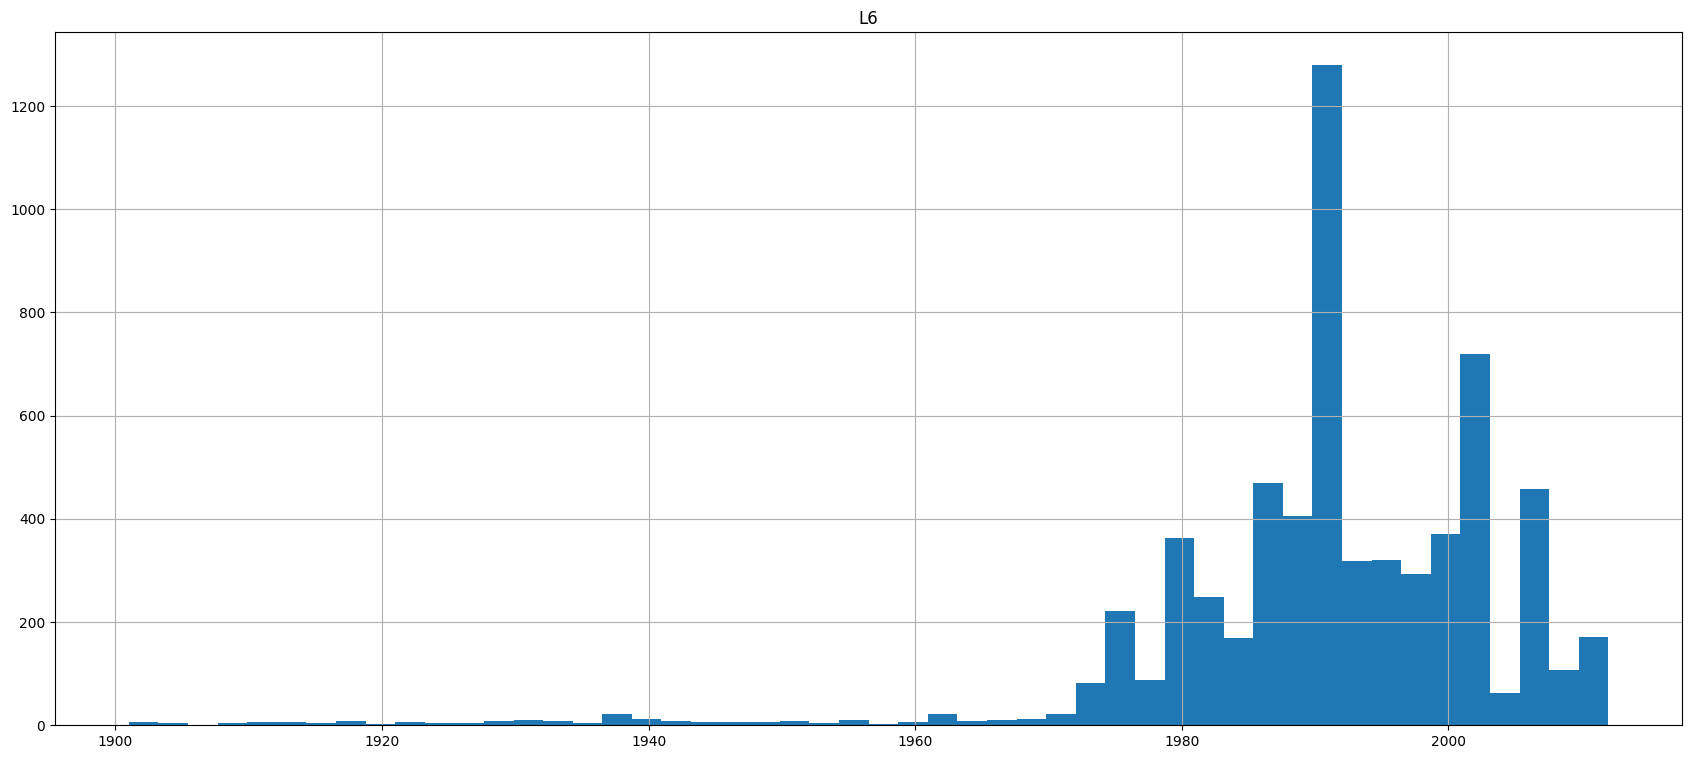

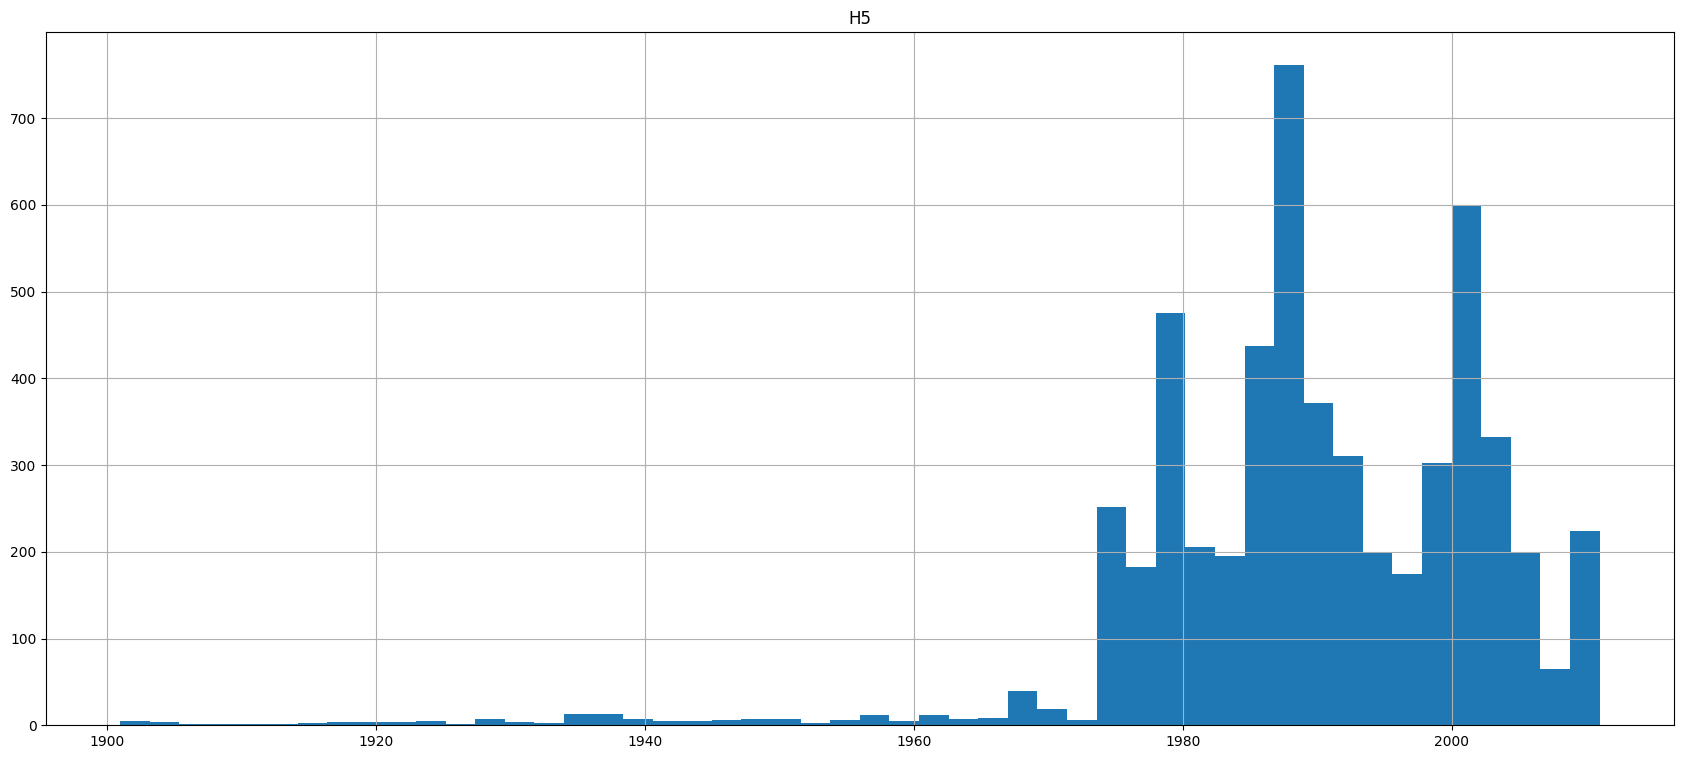

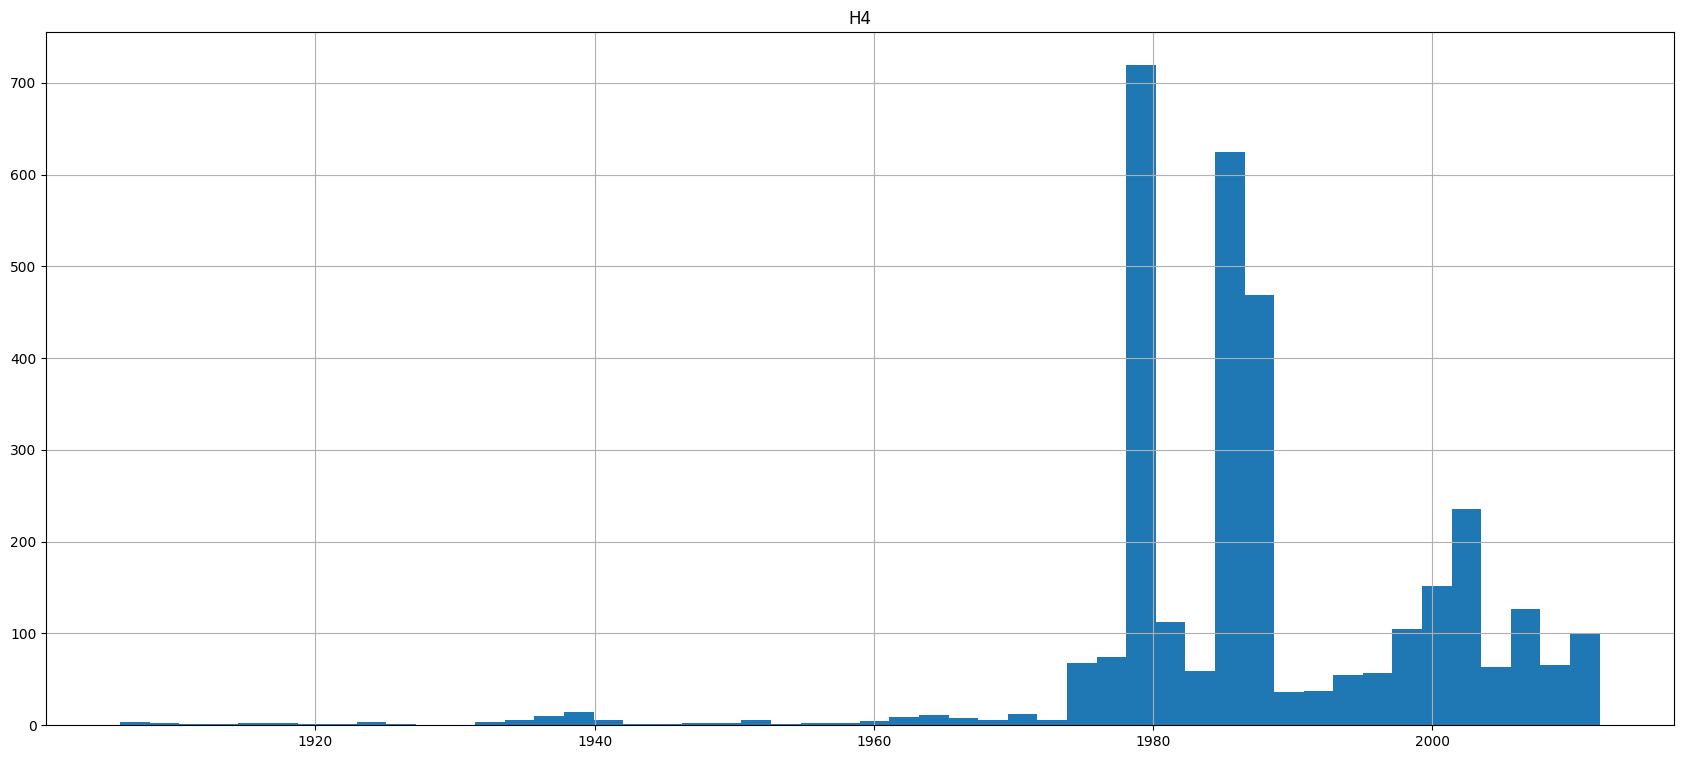

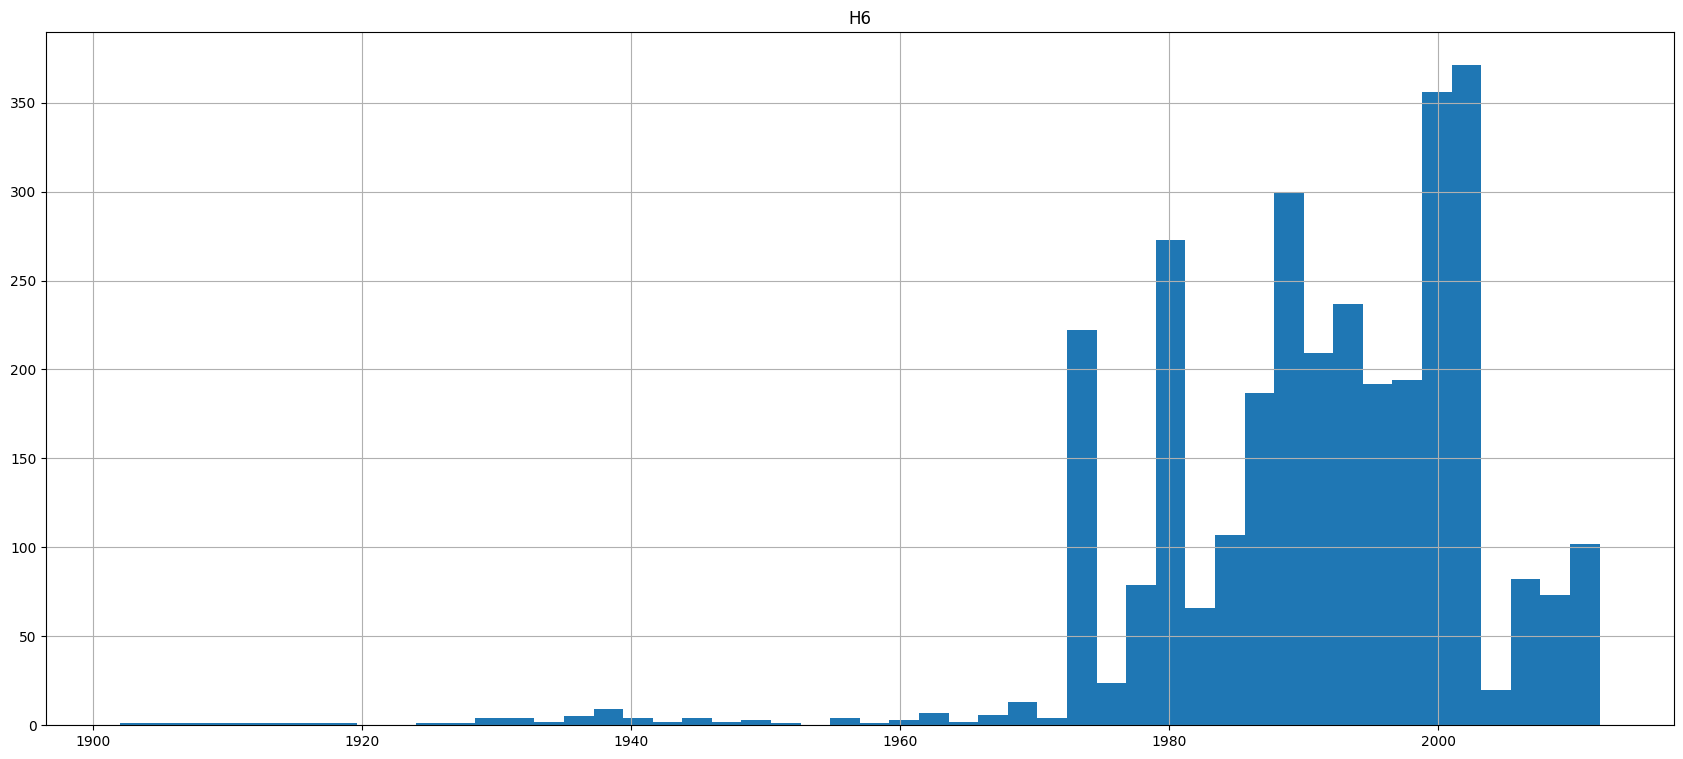

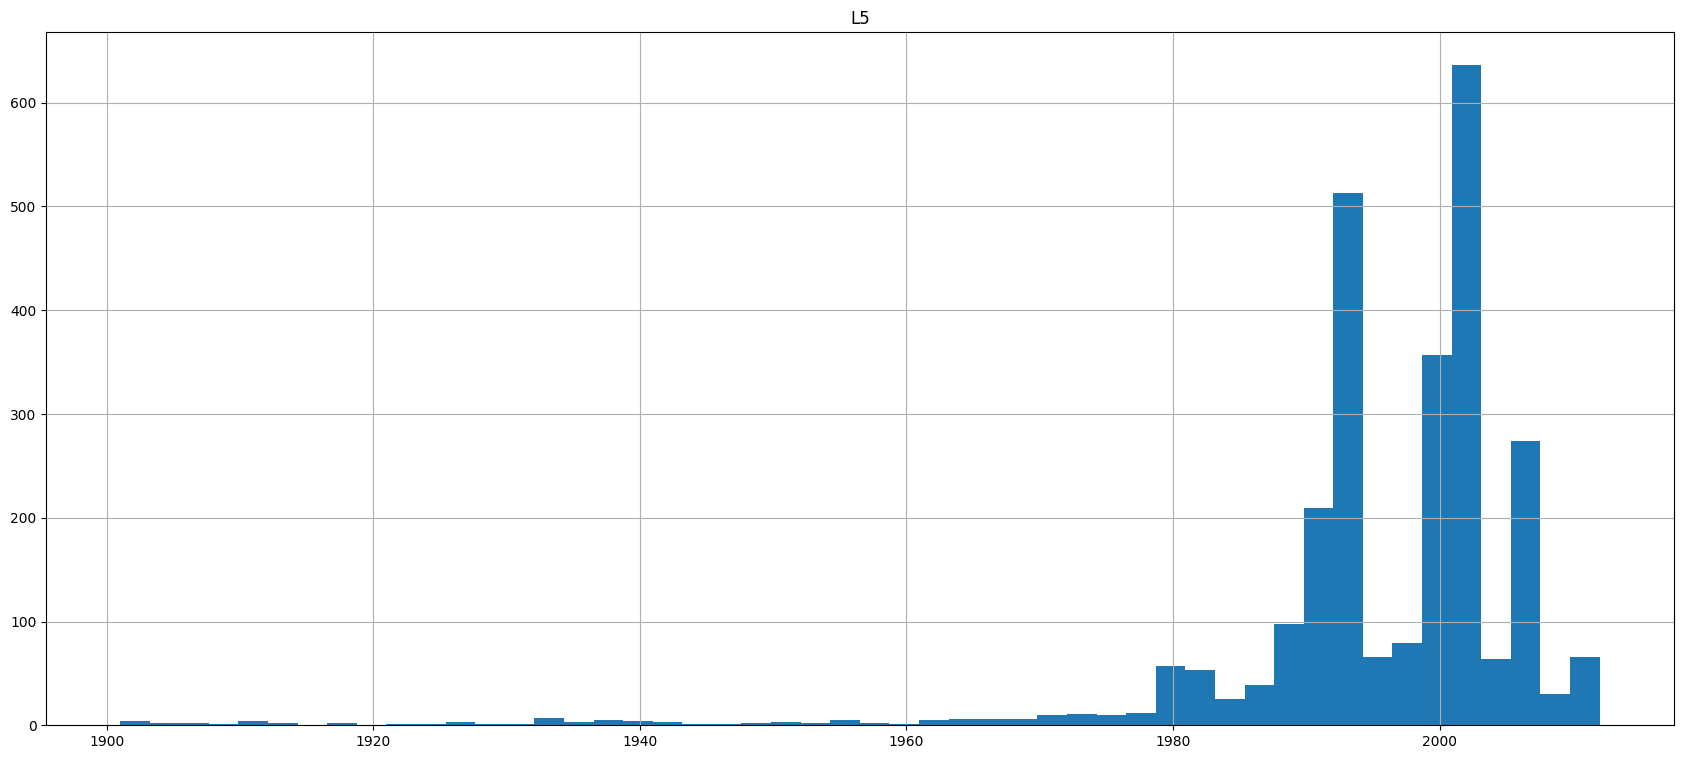

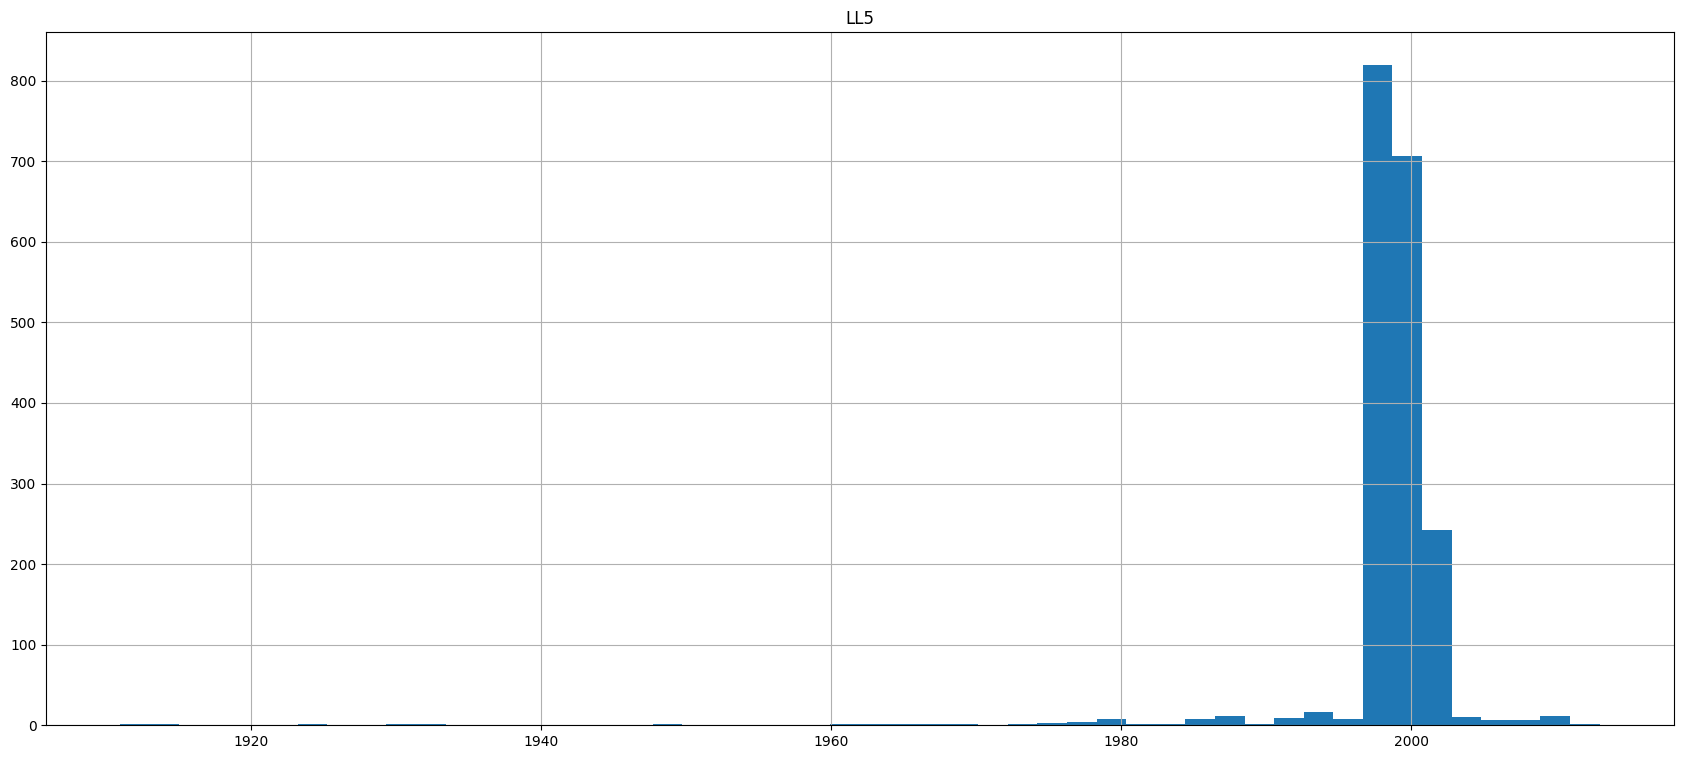

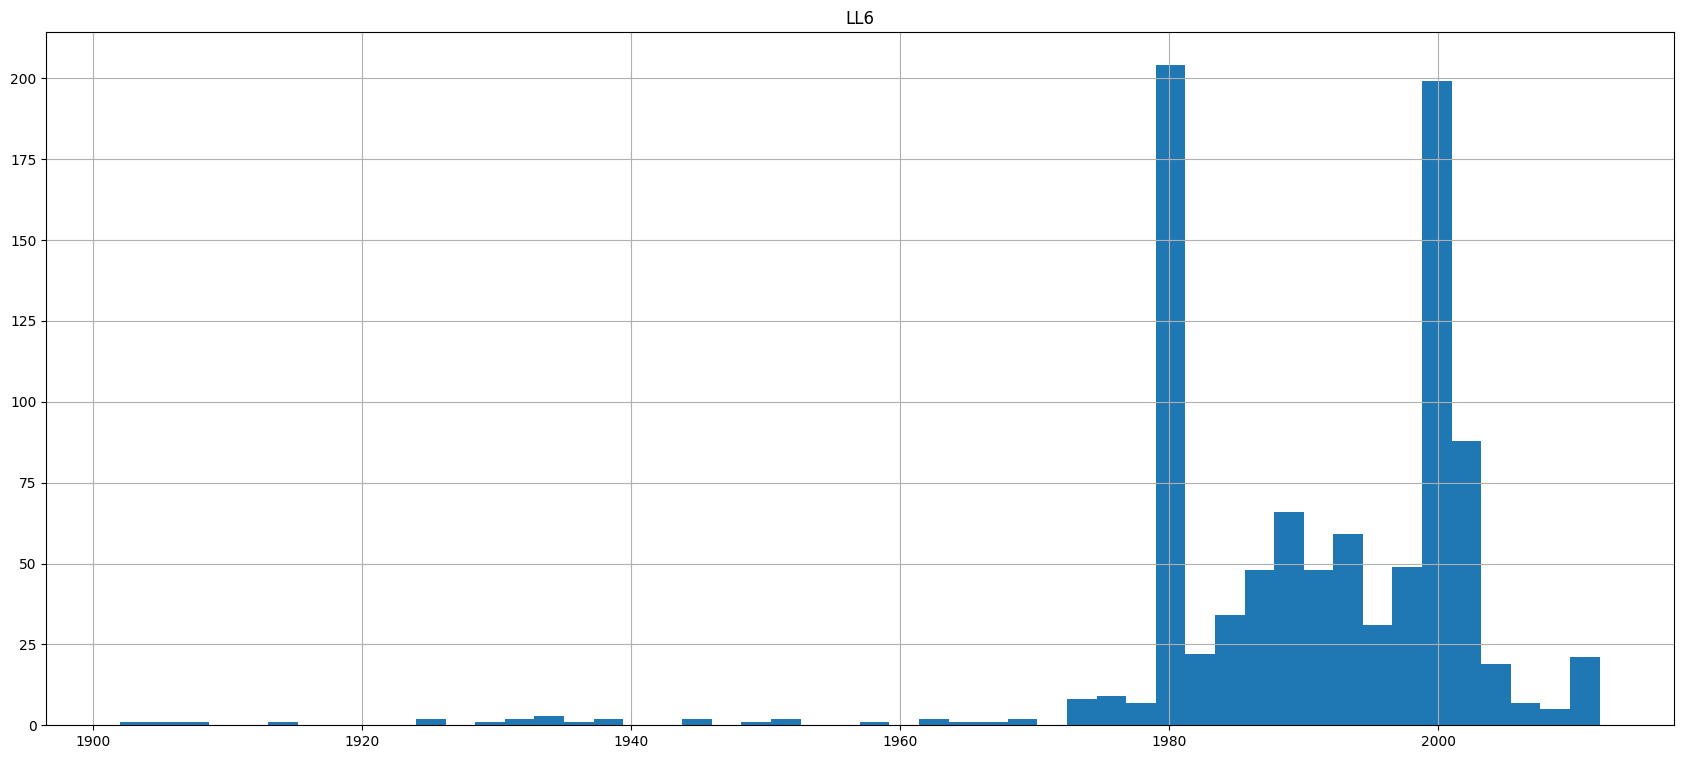

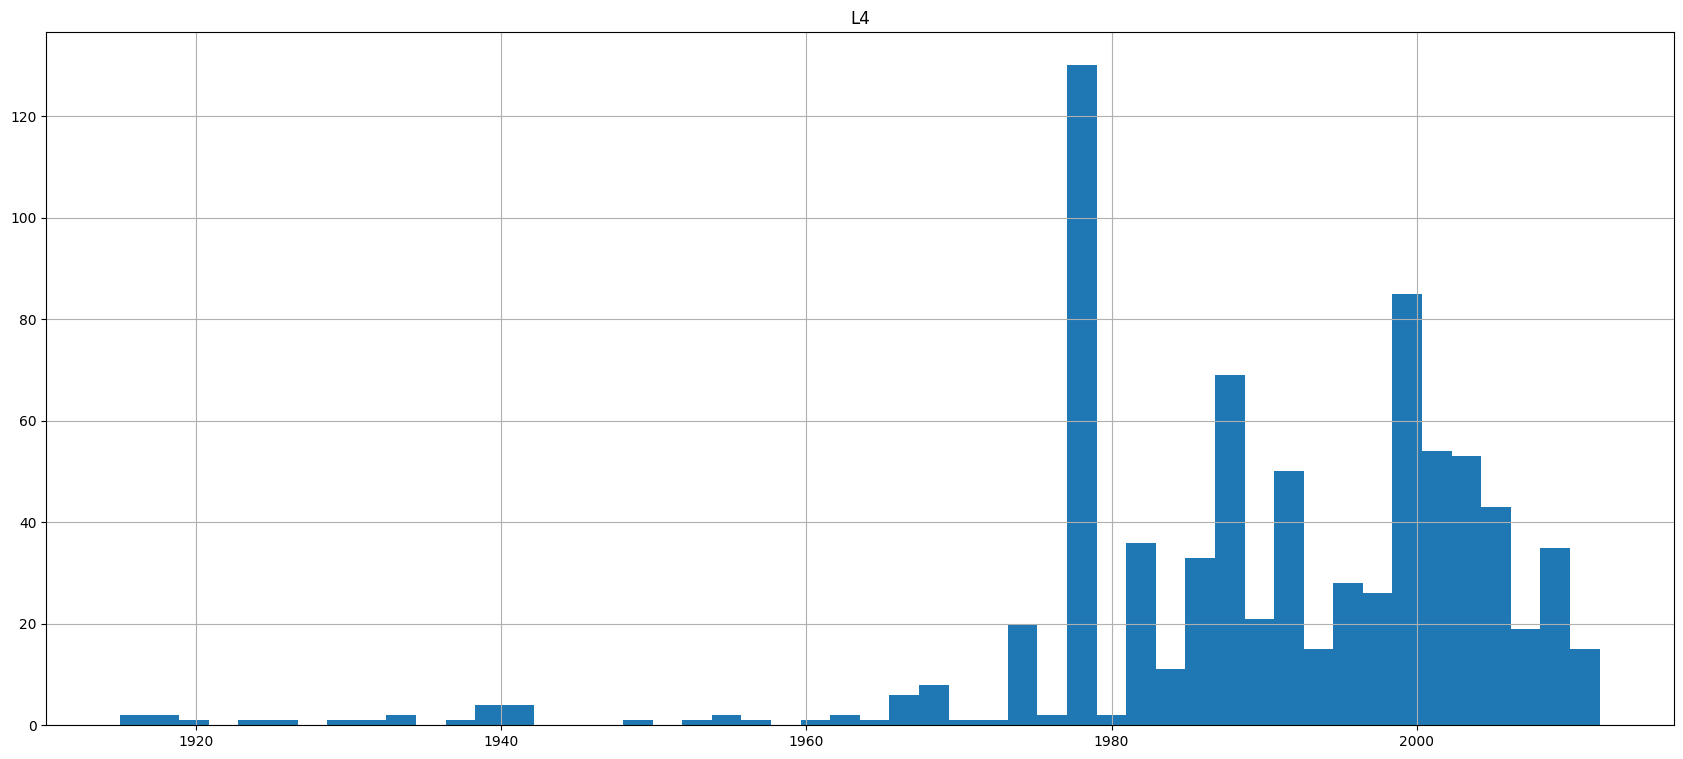

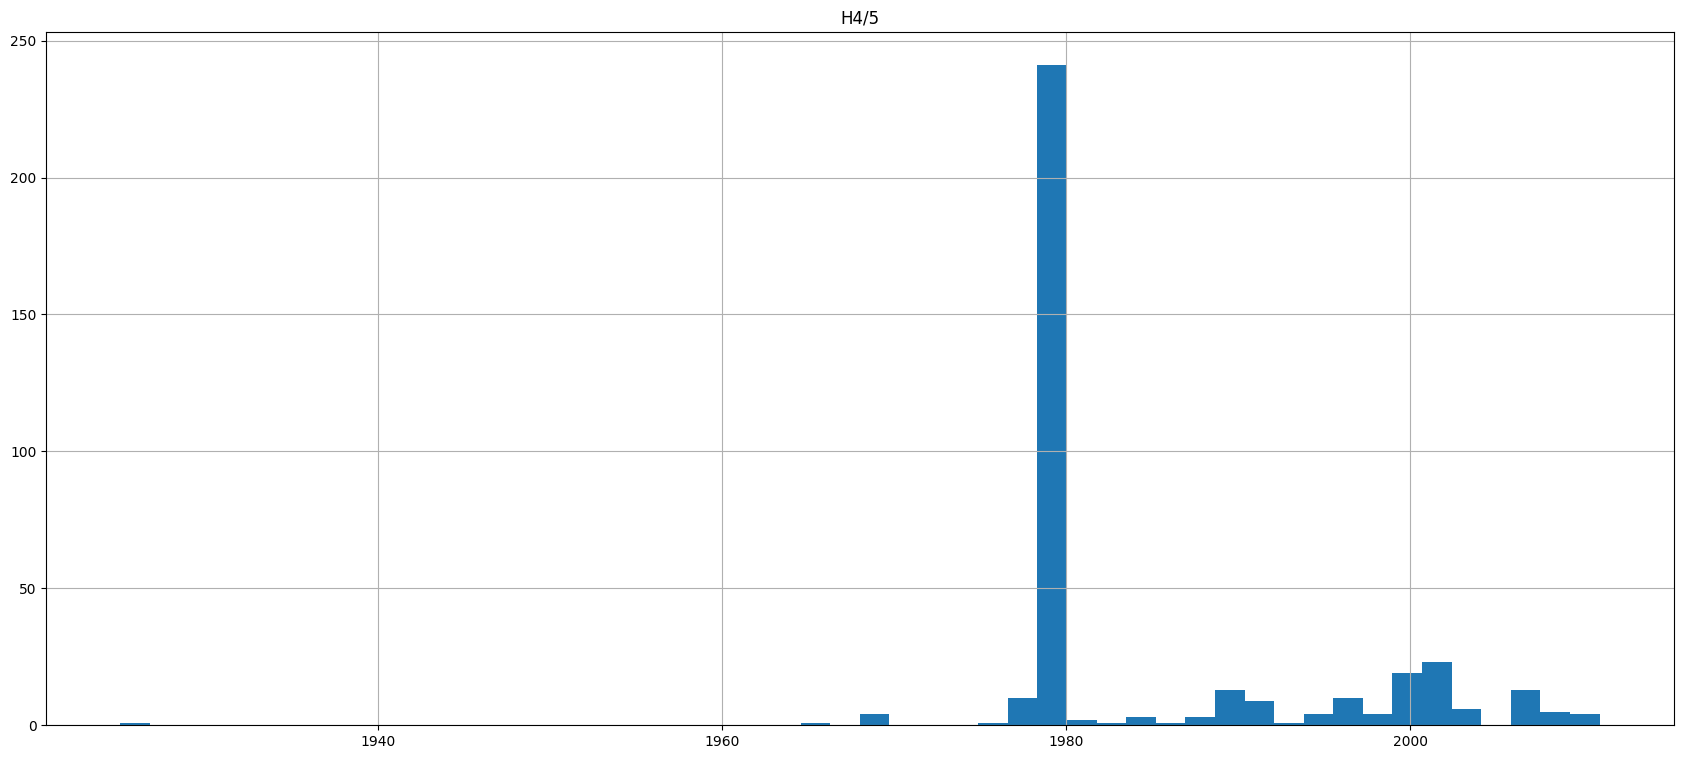

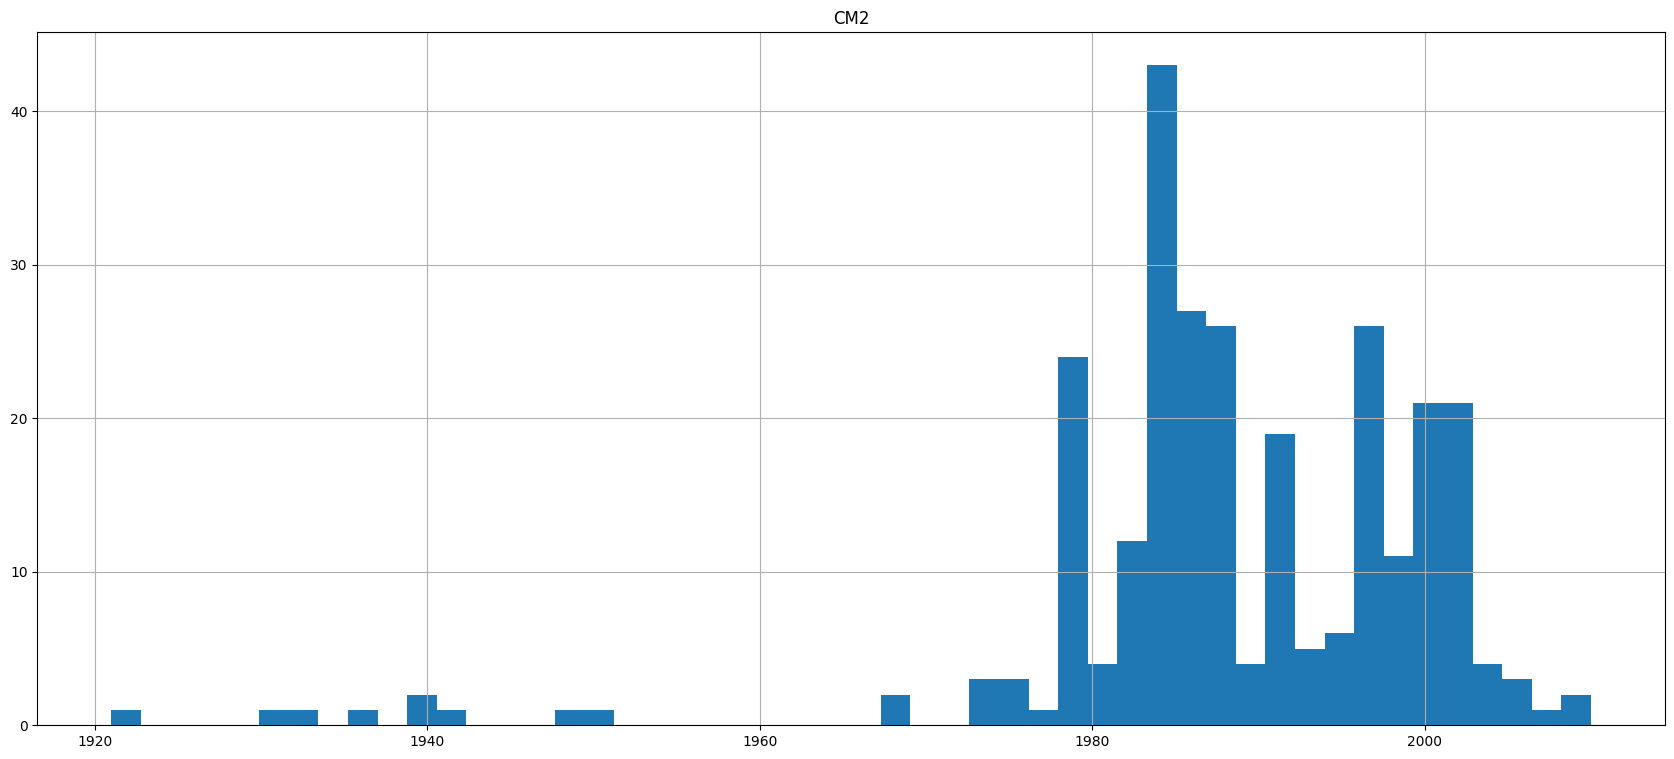

In [ ]:
# Teacher Action: Plot the histograms for the top 10 most number of fallen meteorite classes using the 'hist()' function.
for i in met_class_counts[:10].index:
  plt.figure(figsize=(21,9))
  plt.title(i)
  plt.hist(correct_lat_long_df.loc[(correct_lat_long_df["recclass"]==i)&(correct_lat_long_df["year"]>1900),"year"],bins=50)
  plt.grid()
  plt.show()

In [ ]:
correct_lat_long_df.loc[(correct_lat_long_df["recclass"]=="L6")&(correct_lat_long_df["year"]>1900)]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.166670, -64.950000)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930,-31.60000,-65.23333,"(-31.600000, -65.233330)"
11,Aïr,424,Valid,L6,24000.0,Fell,1925,19.08333,8.38333,"(19.083330, 8.383330)"
13,Akaba,426,Valid,L6,779.0,Fell,1949,29.51667,35.05000,"(29.516670, 35.050000)"
42,Aomori,2313,Valid,L6,320.0,Fell,1984,40.81056,140.78556,"(40.810560, 140.785560)"
...,...,...,...,...,...,...,...,...,...,...
45671,Yayjinna,30359,Valid,L6,262.5,Found,1965,-32.03333,126.17500,"(-32.033330, 126.175000)"
45673,Yelland 001,54765,Valid,L6,4.5,Found,2011,39.55801,-114.42715,"(39.558010, -114.427150)"
45681,York (stone),30368,Valid,L6,1440.0,Found,1928,40.86667,-97.60000,"(40.866670, -97.600000)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990,29.03700,17.01850,"(29.037000, 17.018500)"


There is no definite recognisable pattern in the fall of the meteorites over the years for a class of a meteorite.

The only concrete observation that we can make from the histograms is that the most number of `LL5` class meteorites fell between the years 1995 and 2005 and the most number of the `H4/5` class meteorites fell between the years 1975 and 1980.

That's it for now. In the next class, we will learn how to add additional information such as the counts of the meteorites in the histograms and count plots.

---

### **Project**

You can now attempt the **Applied Tech Project 27 - Histogram** on your own.


**Applied Tech Project 27 - Histogram**: https://colab.research.google.com/drive/1t9cpf79IylM4UFh68-r66tAzrX2R_U9u

---